# Exploração Multilíngue de Redes Neurais para Análise de Sentimentos em Avaliações de Filmes


### Desenvolvido por: Fernanda Paula Rocha



## Introdução

No âmbito do meu MBA em ciência de dados do CeMEAI - ICMC/USP São Carlos, fui desafiada a realizar uma projeto como avaliação final na disciplina de Redes Neurais e Arquiteturas Profundas ministrada pelo Prof° Dr. Moacir Antonelli Ponti. O projeto envolve a aplicação de técnicas avançadas de Processamento de Linguagem Natural (em inglês, Natural Language Processing (NLP)) para análise de sentimentos em avaliações de filmes. Utilizarei o conjunto de dados `imdb-reviews-pt-br.csv`, que contém avaliações de filmes em português e inglês coletadas do renomado site IMDB.Será utilizada nesse projeto uma Rede Neural Densa, também conhecida como Multi-Layer Perceptron - MLP.

## Conjunto de Dados
O conjunto de dados utilizado é o ``imdb-reviews-pt-br.csv``, composto pelas seguintes variáveis:

1. **`id`:** Número de identificação da fatura. Se este código começar com a letra **'c'**, indica cancelamento.
2. **`text_en`:** Textos em inglês.
3. **`text_pt`:** Textos em português.
4. **`sentiment`:** sentimento relacionado à avaliação: positivo ou negativo.


## Objetivo do Projeto

O objetivo principal deste projeto é a aplicação de embeddings de sentenças pré-treinadas, capazes de lidar com múltiplos idiomas. A ideia é avaliar e comparar o desempenho de diferentes redes neurais na tarefa de análise de sentimentos para textos tanto em português quanto em inglês.

**Observação:** o estudo foi realizado no ambiente Colab devido a GPU existente e a quantidade de dados.


# -------------------------------------------------------------------
# Carregamento e Exploração Inicial dos Dados
# -------------------------------------------------------------------

In [65]:
#!pip install sentence_transformers

In [12]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# --------------------------------------------------------------

import random
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from keras.models import Model

from tensorflow.random import set_seed
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import activations, Input
from sentence_transformers import SentenceTransformer

import warnings
warnings.filterwarnings("ignore")


# Versões das bibliotecas utilizadas:
# Pandas: 1.5.3
# NumPy: 1.23.5
# Matplotlib: 3.7.1
# Tensorflow: 2.15.0
# Sklearn: 1.2.2

In [13]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Tensorflow:", tf.__version__)
print("Sklearn:", sklearn.__version__)


Versões das bibliotecas utilizadas:
Pandas: 1.5.3
NumPy: 1.23.5
Matplotlib: 3.7.1
Tensorflow: 2.15.0
Sklearn: 1.2.2


### 2. Carregar base de dados e obter amostra

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Base de dados
df_orig = pd.read_csv("imdb-reviews-pt-br.csv", delimiter=',', engine='python')

Nesse projeto, será obtido uma amostra do conjunto original devido a sua dimensão e o poder de processamento exigido para a elaboração do projeto.

In [16]:
# obter amostra
df_sample = df_orig.sample(n = 10000)
df_sample

,id,text_en,text_pt,sentiment
43605,43607,I saw the description of the movie on TCM and ...,Eu vi a descrição do filme no TCM e só o deixe...,pos
45152,45154,Branagh and Fishburne deliver excellent perfor...,Branagh e Fishburne oferecem excelentes perfor...,pos
32741,32743,the only enjoyable thing about this highly moc...,A única coisa agradável sobre este filme altam...,neg
43329,43331,Easily 9 out of 10 for a film by director we w...,Facilmente 9 de 10 para um filme pelo diretor ...,pos
48256,48258,This is a pretty well known one so i wont get ...,"Este é um bem conhecido, então eu não vou me a...",pos
...,...,...,...,...
1689,1690,The Russian space station Avna with a crew of ...,"A estação espacial russa Avna, com uma tripula...",neg
18428,18430,This film had about everything one could wish ...,Este filme tinha tudo o que se poderia desejar...,pos
1112,1113,"Yes, its a SBIF So Bad Its Funny classic. With...","Sim, é um clássico SBIF So Bad Its Funny. Com ...",neg
22809,22811,"A light, uplifting and engaging movie. Watchin...","Um filme leve, edificante e envolvente. Assist...",pos


# --------------------------------------------------------------
# Pré-processamento de Dados
# --------------------------------------------------------------

In [64]:
print("Quantidade de avaliações para cada classe no conjunto original:\n",df_orig.sentiment.value_counts())

Quantidade de avaliações para cada classe no conjunto original:
 neg    24765
pos    24694
Name: sentiment, dtype: int64


In [63]:
print("Quantidade de avaliações para cada classe na amostra:\n", df_sample.sentiment.value_counts())

Quantidade de avaliações para cada classe na amostra:
 neg    5013
pos    4987
Name: sentiment, dtype: int64


As proporções de distribuição das classes continuaram próximas.

O modelo ``distiluse-base-multilingual-cased-v1`` é projetado para a tarefa de incorporação de sentenças multilíngue.

In [17]:
# Carregar o modelo 'distiluse-base-multilingual-cased-v1
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

### 3. Geração dos embeddings

 `model.encode(texto, batch_size=8, show_progress_bar=True)`

 ``batch_size`` = 8, significa que o modelo processará 8 sentenças por lote.

In [18]:
df_pt = df_sample['text_pt'].tolist()
df_en = df_sample['text_en'].tolist()
clf = df_sample['sentiment']

emb_pt = model.encode(df_pt, batch_size=8, show_progress_bar=True)
emb_en = model.encode(df_en, batch_size=8, show_progress_bar=True)


Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

In [19]:
# salvando embedding

pt_embedding = pd.DataFrame(emb_pt)
pt_embedding.to_csv("/content/drive/MyDrive/Redes Neurais_Notebooks/Avaliação Final/pt_embedding.csv")

en_embedding = pd.DataFrame(emb_en)
en_embedding.to_csv("/content/drive/MyDrive/Redes Neurais_Notebooks/Avaliação Final/en_embedding.csv")

### 4. Separar dados em treinamento e teste e preparar rótulos

In [20]:
pt_X_train, pt_X_test, pt_y_train, pt_y_test = train_test_split(pt_embedding, clf, train_size=0.85, test_size=0.15, random_state=42)
en_X_train, en_X_test, en_y_train, en_y_test = train_test_split(en_embedding, clf, train_size=0.85, test_size=0.15,  random_state=42)

en_y_test = en_y_test.map({'neg':0,'pos':1})
en_y_train = en_y_train.map({'neg':0,'pos':1})

pt_y_test = pt_y_test.map({'neg':0,'pos':1})
pt_y_train = pt_y_train.map({'neg':0,'pos':1})

# --------------------------------------------------------------
# Treinando os modelos
# --------------------------------------------------------------

Alguns parâmetros utilizados nas redes neurais.

``Dense(256, activation='relu')``:No caso, há duas camadas densas (totalizando 256+256=512 neurônios) com ativação ReLU (introduz não lineariedade).

``Dense(128, activation='linear')``: Uma camada densa com 128 neurônios e ativação linear. A ativação linear significa que a saída desta camada é uma combinação linear dos inputs, sem aplicar uma função de ativação não linear.

``BatchNormalization()``: Camada de normalização em lote.

``Activation(activations.relu)``:Uma camada de ativação ReLU adicionada.

``Dropout``: Uma camada de desativação (dropout) com uma taxa de 0.25,por exemplo, significa que 25% dos neurônios serão aleatoriamente desativados durante o treinamento para evitar overfitting.

``Dense(1, activation='sigmoid')``: A camada densa de saída com um único neurônio e ativação sigmoid. Esta camada é comum em problemas de classificação binária, onde a saída é uma probabilidade entre 0 e 1.

### Modelo A: classificador de sentimento em **inglês**






In [21]:
## Modelo A
seed(1)
set_seed(1)

input_shape = en_X_train.shape[1]

modeloA = keras.Sequential()
modeloA.add(Input(shape=input_shape))
modeloA.add(keras.layers.BatchNormalization())
modeloA.add(keras.layers.Dense(256, activation='relu'))
modeloA.add(keras.layers.Dense(256, activation='relu'))
modeloA.add(keras.layers.Dense(128, activation='linear'))
modeloA.add(keras.layers.BatchNormalization())
modeloA.add(keras.layers.Activation(activations.relu))
modeloA.add(keras.layers.Dropout(0.25))
modeloA.add(keras.layers.Dense(1, activation='sigmoid'))
modeloA.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 128)               0

A função ``scheduler`` retorna um novo valor para a taxa de aprendizado com base nos parâmetros fornecidos.

``callback`` é usada para ajustar dinamicamente a taxa de aprendizado durante o treinamento. Durante cada época, a função scheduler será chamada, e o novo valor retornado será usado como a taxa de aprendizado para aquela época específica.

In [22]:
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.075)

callbacklr = keras.callbacks.LearningRateScheduler(scheduler)

In [23]:

modeloA.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['Precision','Recall'],
               optimizer=keras.optimizers.Adam(learning_rate= 0.001))

modeloA_hist = modeloA.fit(x = en_X_train, y = en_y_train, batch_size = 16, epochs = 25,  callbacks=[callbacklr], verbose=1)


Epoch 1/25
532/532 [==============================] - 8s 5ms/step - loss: 0.5419 - precision: 0.7292 - recall: 0.7518 - lr: 9.2774e-04
Epoch 2/25
532/532 [==============================] - 3s 5ms/step - loss: 0.4379 - precision: 0.7949 - recall: 0.7940 - lr: 8.6071e-04
Epoch 3/25
532/532 [==============================] - 4s 8ms/step - loss: 0.3811 - precision: 0.8264 - recall: 0.8299 - lr: 7.9852e-04
Epoch 4/25
532/532 [==============================] - 3s 5ms/step - loss: 0.3354 - precision: 0.8561 - recall: 0.8557 - lr: 7.4082e-04
Epoch 5/25
532/532 [==============================] - 3s 5ms/step - loss: 0.2675 - precision: 0.8881 - recall: 0.8961 - lr: 6.8729e-04
Epoch 6/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1970 - precision: 0.9234 - recall: 0.9221 - lr: 6.3763e-04
Epoch 7/25
532/532 [==============================] - 3s 5ms/step - loss: 0.1576 - precision: 0.9425 - recall: 0.9392 - lr: 5.9156e-04
Epoch 8/25
532/532 [==============================] - 4

In [24]:
print("loss do modelo A  ---", modeloA_hist.history['loss'])
print("precision do modelo A ---", modeloA_hist.history['precision'])
print("recall do modelo A ---", modeloA_hist.history['recall'])


loss do modelo A  --- [0.5419489145278931, 0.43786078691482544, 0.3810800611972809, 0.3353792726993561, 0.26753634214401245, 0.19704703986644745, 0.1576053649187088, 0.13730111718177795, 0.1018267571926117, 0.08387303352355957, 0.07461606711149216, 0.0656004548072815, 0.06218874827027321, 0.05094463750720024, 0.04948028549551964, 0.038783662021160126, 0.03418155014514923, 0.0302229393273592, 0.033942531794309616, 0.02632475458085537, 0.031511954963207245, 0.018450584262609482, 0.022784840315580368, 0.014964284375309944, 0.02648158185184002]
precision do modelo A --- [0.7291761636734009, 0.7949259877204895, 0.8264018893241882, 0.8561033010482788, 0.888139545917511, 0.9234022498130798, 0.9425476789474487, 0.9475163817405701, 0.9628497362136841, 0.9684432148933411, 0.9734742045402527, 0.9776838421821594, 0.9788035750389099, 0.9805392622947693, 0.9828758835792542, 0.9871103763580322, 0.9898965954780579, 0.9891942739486694, 0.988036572933197, 0.9885272979736328, 0.9880478382110596, 0.995302

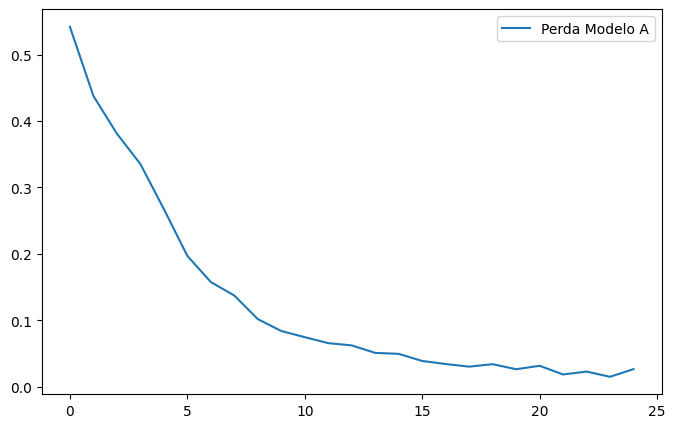

In [25]:
# função de perda
plt.figure(figsize=(8,5))
plt.plot(modeloA_hist.history['loss'])
plt.legend(["Perda Modelo A"])

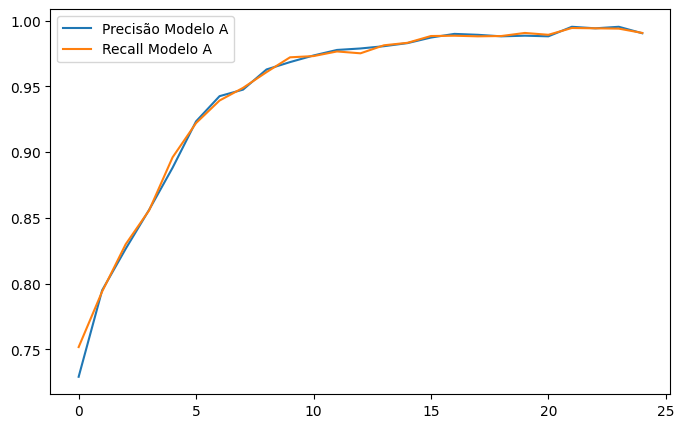

In [26]:
# função de perda
plt.figure(figsize=(8,5))
plt.plot(modeloA_hist.history['precision'])
plt.plot(modeloA_hist.history['recall'])
plt.legend(["Precisão Modelo A", "Recall Modelo A"])

### Conclusões do treinamento

O modelo está treinando de forma eficaz, como indicado pela diminuição da perda ao longo das épocas. A precisão e o recall estão melhorando, indicando que o modelo está se tornando mais preciso e capaz de capturar mais exemplos positivos. A taxa de aprendizado decrescente pode ajudar na estabilidade do treinamento, permitindo que o modelo ajuste os pesos de maneira mais cuidadosa à medida que se aproxima da solução ideal.

### Modelo B: classificador de sentimento em **português**

In [27]:
#
## Modelo B
seed(1)
set_seed(1)

input_shape = pt_X_train.shape[1]


modeloB = keras.Sequential()
modeloB.add(Input(shape=input_shape))
modeloB.add(keras.layers.BatchNormalization())
modeloB.add(keras.layers.Dense(256, activation='relu'))
modeloB.add(keras.layers.Dense(256, activation='relu'))
modeloB.add(keras.layers.Dense(128, activation='linear'))
modeloB.add(keras.layers.BatchNormalization())
modeloB.add(keras.layers.Activation(activations.relu))
modeloB.add(keras.layers.Dropout(0.25))
modeloB.add(keras.layers.Dense(1, activation='sigmoid'))
modeloB.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)              

In [28]:
modeloB.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['Precision','Recall'],
               optimizer=keras.optimizers.Adam(learning_rate= 0.001))

modeloB_hist = modeloB.fit(x = pt_X_train, y = pt_y_train, batch_size = 16, epochs = 25,  callbacks=[callbacklr], verbose=1)


Epoch 1/25
532/532 [==============================] - 4s 5ms/step - loss: 0.5592 - precision: 0.7144 - recall: 0.7318 - lr: 9.2774e-04
Epoch 2/25
532/532 [==============================] - 3s 6ms/step - loss: 0.4676 - precision: 0.7734 - recall: 0.7799 - lr: 8.6071e-04
Epoch 3/25
532/532 [==============================] - 3s 6ms/step - loss: 0.4095 - precision: 0.8105 - recall: 0.8170 - lr: 7.9852e-04
Epoch 4/25
532/532 [==============================] - 3s 5ms/step - loss: 0.3611 - precision: 0.8443 - recall: 0.8395 - lr: 7.4082e-04
Epoch 5/25
532/532 [==============================] - 3s 5ms/step - loss: 0.2913 - precision: 0.8700 - recall: 0.8796 - lr: 6.8729e-04
Epoch 6/25
532/532 [==============================] - 3s 5ms/step - loss: 0.2141 - precision: 0.9146 - recall: 0.9144 - lr: 6.3763e-04
Epoch 7/25
532/532 [==============================] - 3s 6ms/step - loss: 0.1639 - precision: 0.9396 - recall: 0.9338 - lr: 5.9156e-04
Epoch 8/25
532/532 [==============================] - 3

In [29]:
print("loss do modelo B  ---", modeloB_hist.history['loss'])
print("precision do modelo B ---", modeloB_hist.history['precision'])
print("recall do modelo B ---", modeloB_hist.history['recall'])


loss do modelo B  --- [0.559226393699646, 0.46759504079818726, 0.40953338146209717, 0.3610745966434479, 0.29131633043289185, 0.21412061154842377, 0.16391615569591522, 0.14066949486732483, 0.10937183350324631, 0.08552605658769608, 0.07894954830408096, 0.06675899028778076, 0.061263807117938995, 0.05366729944944382, 0.05394333600997925, 0.04901177063584328, 0.03125372156500816, 0.037979815155267715, 0.03963148593902588, 0.027209099382162094, 0.03468158841133118, 0.019950779154896736, 0.02493445947766304, 0.01649279147386551, 0.02525576949119568]
precision do modelo B --- [0.7143839001655579, 0.7733829617500305, 0.8105214238166809, 0.8442661762237549, 0.8700394630432129, 0.9145740270614624, 0.9395655989646912, 0.9486091732978821, 0.9609870910644531, 0.9688888788223267, 0.9725093841552734, 0.9772033095359802, 0.9784290790557861, 0.9817116260528564, 0.9817159175872803, 0.9824232459068298, 0.9908342957496643, 0.985466480255127, 0.9863849878311157, 0.9899250268936157, 0.9889645576477051, 0.993

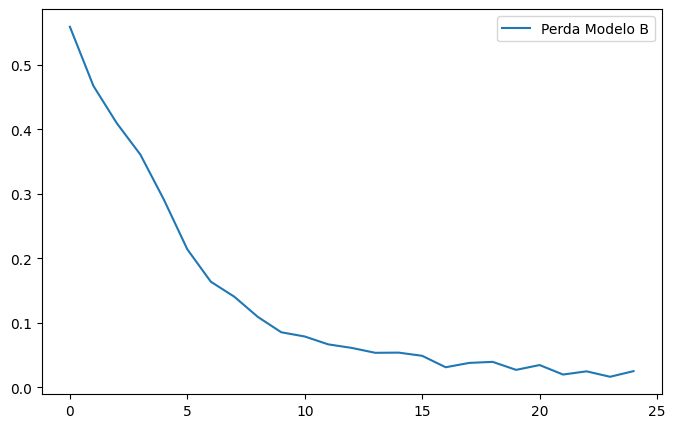

In [30]:
# função de perda
plt.figure(figsize=(8,5))
plt.plot(modeloB_hist.history['loss'])
plt.legend(["Perda Modelo B"])

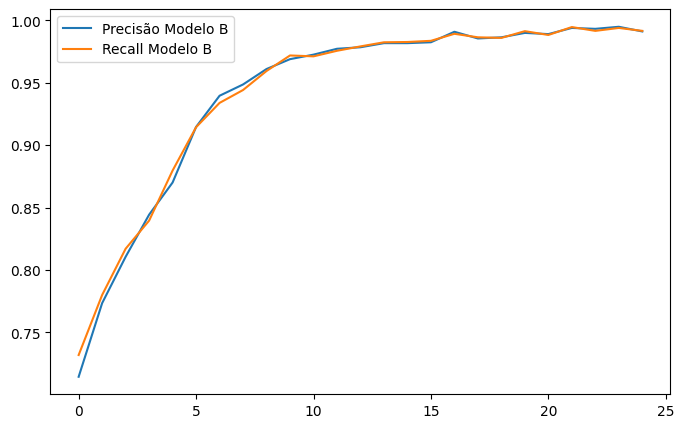

In [31]:
# função de perda
plt.figure(figsize=(8,5))
plt.plot(modeloB_hist.history['precision'])
plt.plot(modeloB_hist.history['recall'])
plt.legend(["Precisão Modelo B", "Recall Modelo B"])

 O Modelo B está aprendendo efetivamente com base na diminuição da perda. A precisão e o recall estão aumentando, sugerindo que o modelo está melhorando tanto na identificação correta das instâncias positivas quanto na minimização dos falsos positivos. O agendamento dinâmico da taxa de aprendizado pode estar ajudando na convergência do modelo.

### Avaliação dos modelos: métricas durante treinamento e avaliação das métricas cross-dataset

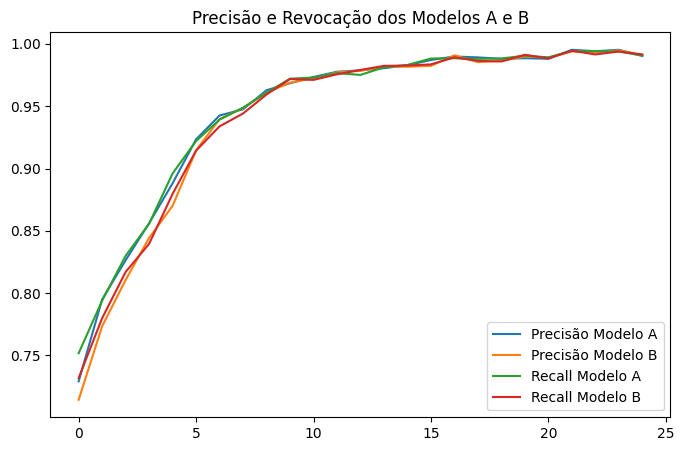

In [32]:
# Gráfico da precisão e revocação calculada no treinamento ao longo das épocas para o modelos A e B

plt.figure(figsize=(8,5))
plt.plot(modeloA_hist.history['precision'])
plt.plot(modeloB_hist.history['precision'])
plt.plot(modeloA_hist.history['recall'])
plt.plot(modeloB_hist.history['recall'])
plt.title("Precisão e Revocação dos Modelos A e B")
plt.legend(["Precisão Modelo A", "Precisão Modelo B", "Recall Modelo A", "Recall Modelo B"])

In [33]:
#  Precisão e revocação calculadas no teste usando o idioma usado no treinamento

  # calcular métricas do modelo A (treinado com dados em ingles) usando o conjunto de teste ingles
#print("Precisão e Revocação calculadas no teste usando o idioma usado no treinamento \n")

print(" \nMétricas dos modelo A (treinado com dados em inglês) usando o conjunto de teste inglês")
print("precision do modelo A (treinado com dados em inglês) usando o conjunto de teste inglês ---", modeloA.evaluate(en_X_test, en_y_test, verbose = 0)[1])
print("recall do modelo A (treinado com dados em inglês) usando o conjunto de teste inglês ---", modeloA.evaluate(en_X_test,en_y_test, verbose = 0)[2])

 # calcular métricas do modelo B (treinado com dados em português) usando o conjunto de teste português
print("\nMétricas do modelo B (treinado com dados em português) usando o conjunto de teste português")
print("precision do modelo B (treinado com dados em português) usando o conjunto de teste português ---", modeloB.evaluate(pt_X_test, pt_y_test, verbose = 0)[1])
print("recall do do modelo B (treinado com dados em português) usando o conjunto de teste português ---", modeloB.evaluate(pt_X_test,pt_y_test, verbose = 0)[2])



# Exibe precisão e revocação calculadas de forma cruzada
# Métricas do modelo A (treinado com dados em ingles) usando o conjunto de teste português

print("\nPrecisão e Revocação calculadas de forma cruzada do Modelo A")
print("precision do modelo A (treinado com dados em inglês) usando o conjunto de teste português --- ", modeloA.evaluate(pt_X_test, pt_y_test, verbose = 0)[1])
print("recall do modelo A (treinado com dados em inglês) usando o conjunto de teste portugês --- ", modeloA.evaluate(pt_X_test,pt_y_test, verbose = 0)[2])

# Métricas do modelo B (treinado com dados em português) usando o conjunto de teste inglês

print("\nPrecisão e Revocação calculadas de forma cruzada do Modelo B")
print("precision do modelo B (treinado com dados em português) usando o conjunto de teste inglês --- ", modeloB.evaluate(en_X_test, en_y_test, verbose = 0)[1])
print("recall do modelo B (treinado com dados em português) usando o conjunto de teste inglês --- ", modeloB.evaluate(en_X_test, en_y_test, verbose = 0)[2])


 
Métricas dos modelo A (treinado com dados em inglês) usando o conjunto de teste inglês
precision do modelo A (treinado com dados em inglês) usando o conjunto de teste inglês --- 0.77098149061203
recall do modelo A (treinado com dados em inglês) usando o conjunto de teste inglês --- 0.747586190700531

Métricas do modelo B (treinado com dados em português) usando o conjunto de teste português
precision do modelo B (treinado com dados em português) usando o conjunto de teste português --- 0.7443105578422546
recall do do modelo B (treinado com dados em português) usando o conjunto de teste português --- 0.7668965458869934

Precisão e Revocação calculadas de forma cruzada do Modelo A
precision do modelo A (treinado com dados em inglês) usando o conjunto de teste português ---  0.7072879076004028
recall do modelo A (treinado com dados em inglês) usando o conjunto de teste portugês ---  0.8165517449378967

Precisão e Revocação calculadas de forma cruzada do Modelo B
precision do modelo B (t

Ambos os modelos apresentam desempenho semelhante nos conjuntos de teste originais de suas respectivas línguas. A precisão e o recall estão em níveis razoáveis, indicando uma capacidade de classificação.

Quando testados nos conjuntos de teste da língua oposta, ambos os modelos mostram uma queda nas métricas de precisão e recall. Isso sugere que o desempenho dos modelos pode ser afetado ao lidar com idiomas diferentes daqueles em que foram treinados.

O Modelo A, treinado com dados em inglês, tem um desempenho relativamente melhor ao ser testado em português (maior recall e precisão) em comparação com o Modelo B testado em inglês.

A adaptação cruzada (testar em uma língua diferente da língua de treinamento) parece afetar mais significativamente o Modelo B, treinado com dados em português.



### Fine-tuning (afinação ou ajuste fino, em português) do Modelo A usando dados em português

O "Modelo A" foi treinado com texto em inglês, o "Modelo B" foi treinado com texto em português, e agora refere-se a um processo de treinamento adicional realizando o fine-tuning do "Modelo A" usando dados em português.

In [34]:
# congelando camada
modeloA.layers[1].trainable = False

In [35]:
modeloA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 128)               0

In [36]:
modeloA.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['Precision','Recall'],
               optimizer=keras.optimizers.Adam(learning_rate= 0.00001))

modeloA_fine = modeloA.fit(x = pt_X_train, y = pt_y_train, epochs = 25, verbose=1)

Epoch 1/25
266/266 [==============================] - 3s 5ms/step - loss: 0.1931 - precision: 0.9389 - recall: 0.9514
Epoch 2/25
266/266 [==============================] - 1s 5ms/step - loss: 0.1842 - precision: 0.9445 - recall: 0.9470
Epoch 3/25
266/266 [==============================] - 2s 6ms/step - loss: 0.1791 - precision: 0.9440 - recall: 0.9498
Epoch 4/25
266/266 [==============================] - 2s 7ms/step - loss: 0.1853 - precision: 0.9441 - recall: 0.9465
Epoch 5/25
266/266 [==============================] - 2s 6ms/step - loss: 0.1739 - precision: 0.9441 - recall: 0.9472
Epoch 6/25
266/266 [==============================] - 1s 5ms/step - loss: 0.1753 - precision: 0.9453 - recall: 0.9538
Epoch 7/25
266/266 [==============================] - 1s 5ms/step - loss: 0.1728 - precision: 0.9428 - recall: 0.9507
Epoch 8/25
266/266 [==============================] - 1s 5ms/step - loss: 0.1715 - precision: 0.9441 - recall: 0.9479
Epoch 9/25
266/266 [==============================] - 1s

In [37]:
#  Métricas do modelo A + finetuning usando o conjunto de teste português, comparando com o resultado obtido no modelo B.

print("Métricas do modelo A + finetuning usando o conjunto de teste português")
print("precision modelo A + finetuning usando o conjunto de teste português ---", modeloA.evaluate(pt_X_test, pt_y_test, verbose = 0)[1])
print("recall modelo A + finetuning usando o conjunto de teste português ---", modeloA.evaluate(pt_X_test, pt_y_test, verbose = 0)[2])

# calcular métricas do modelo B (treinado com dados em português)
print("\nMétricas do modelo B")
print("precision modelo B --- ", modeloB.evaluate(pt_X_test, pt_y_test, verbose = 0)[1])
print("recall modelo B --- ", modeloB.evaluate(pt_X_test, pt_y_test, verbose = 0)[2])

Métricas do modelo A + finetuning usando o conjunto de teste português
precision modelo A + finetuning usando o conjunto de teste português --- 0.755215585231781
recall modelo A + finetuning usando o conjunto de teste português --- 0.7489655017852783

Métricas do modelo B
precision modelo B ---  0.7443105578422546
recall modelo B ---  0.7668965458869934


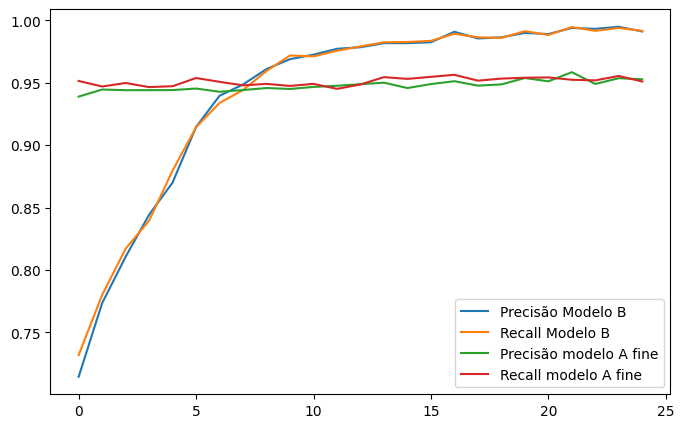

In [38]:
plt.figure(figsize=(8,5))
plt.plot(modeloB_hist.history['precision'])
plt.plot(modeloB_hist.history['recall'])
plt.plot(modeloA_fine.history['precision'])
plt.plot(modeloA_fine.history['recall'])
plt.legend(["Precisão Modelo B", "Recall Modelo B", "Precisão modelo A fine", "Recall modelo A fine"])

O Modelo A + Finetuning tem uma precisão ligeiramente superior (0.7552) em comparação com o Modelo B (0.7443). Isso indica que, entre as instâncias previstas como positivas, o Modelo A + Finetuning tem uma proporção um pouco maior de verdadeiros positivos.

O Modelo B tem um recall ligeiramente superior (0.7669) em comparação com o Modelo A + Finetuning (0.7490). Isso sugere que o Modelo B é um pouco melhor em capturar mais instâncias positivas, minimizando os falsos negativos.

A escolha entre os modelos dependerá do contexto da aplicação e das prioridades específicas. Se a ênfase estiver na precisão das previsões positivas, o Modelo A + Finetuning pode ser preferível. Se a prioridade for capturar a maioria das instâncias positivas, o Modelo B pode ser considerado melhor devido ao recall um pouco maior.



## Espaços de características do textos em português

### Análise dos espaços de características do textos em português usando tSNE em duas dimensões

#### 1. Espaço embedding original em português
#### 2. Espaço embedding 128 dimensões Modelo B (português)
#### 3. Espaço embedding 128 dimensões Modelo A+Finetuning com dados em português

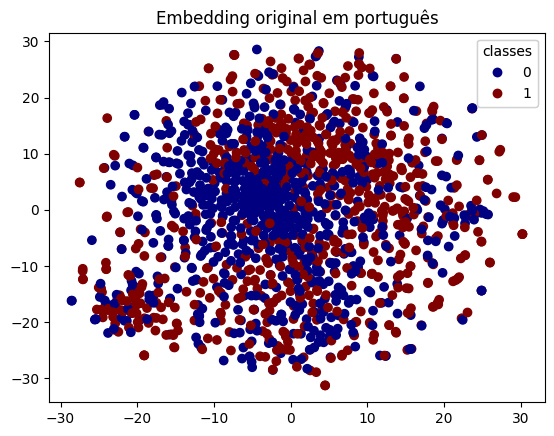

In [46]:
# 1. Espaço embedding original em português
emb_original = TSNE(n_components=2).fit_transform(pt_X_test)

fig, ax = plt.subplots()
scatter = ax.scatter(emb_original[:,0], emb_original[:,1], c = pt_y_test, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="classes")

ax.set_title("Embedding original em português")
ax.add_artist(legend1)


In [40]:
# 2.  Espaço embedding 128 dimensões Modelo B (português)

# Encontra a camada Dropout dinamicamente
dropout_layer = None
for layer in modeloB.layers:
    if isinstance(layer, keras.layers.Dropout):
        dropout_layer = layer
        break

# Se uma camada Dropout for encontrada, cria um modelo de extração
if dropout_layer is not None:
    extraction_modelB = keras.Model(
        inputs=[modeloB.input],
        outputs=[dropout_layer.output]
    )
    extraction_modelB.summary()
else:
    print("Nenhuma camada Dropout encontrada no modelo.")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                            

47/47 [==============================] - 0s 3ms/step


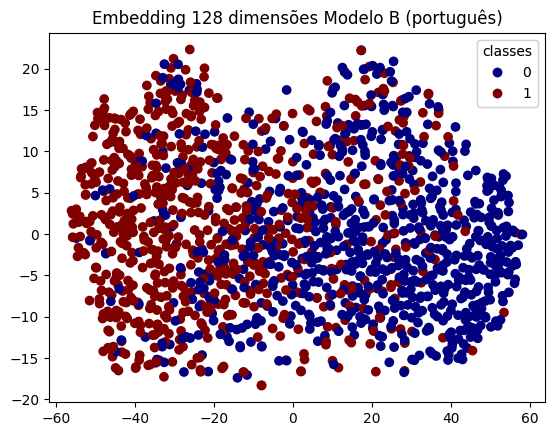

In [47]:
predB = extraction_modelB.predict(pt_X_test)
emb_B = TSNE(n_components=2).fit_transform(predB)

fig, ax = plt.subplots()
scatter = ax.scatter(emb_B[:,0], emb_B[:,1], c = pt_y_test, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="classes")

ax.set_title("Embedding 128 dimensões Modelo B (português)")
ax.add_artist(legend1)


In [42]:
# 3. Espaço embedding 128 dimensões Modelo A+fine-tuning com dados em português
dropout_layer = None
for layer in modeloA.layers:
    if isinstance(layer, keras.layers.Dropout):
        dropout_layer = layer
        break

# Se uma camada Dropout for encontrada, cria um modelo de extração
if dropout_layer is not None:
    extraction_modelAFit = keras.Model(
        inputs=[modeloA.input],
        outputs=[dropout_layer.output]
    )
    extraction_modelAFit.summary()
else:
    print("Nenhuma camada Dropout encontrada no modelo.")


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                          

47/47 [==============================] - 0s 1ms/step


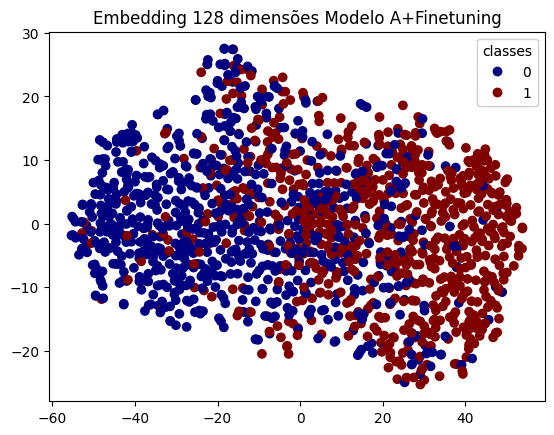

In [50]:
predA_Fit = extraction_modelAFit.predict(pt_X_test)
emb_A_Fit = TSNE(n_components=2).fit_transform(predA_Fit)

fig, ax = plt.subplots()
scatter = ax.scatter(emb_A_Fit[:,0], emb_A_Fit[:,1], c = pt_y_test, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="classes")

ax.set_title("Embedding 128 dimensões Modelo A+Finetuning")
ax.add_artist(legend1)

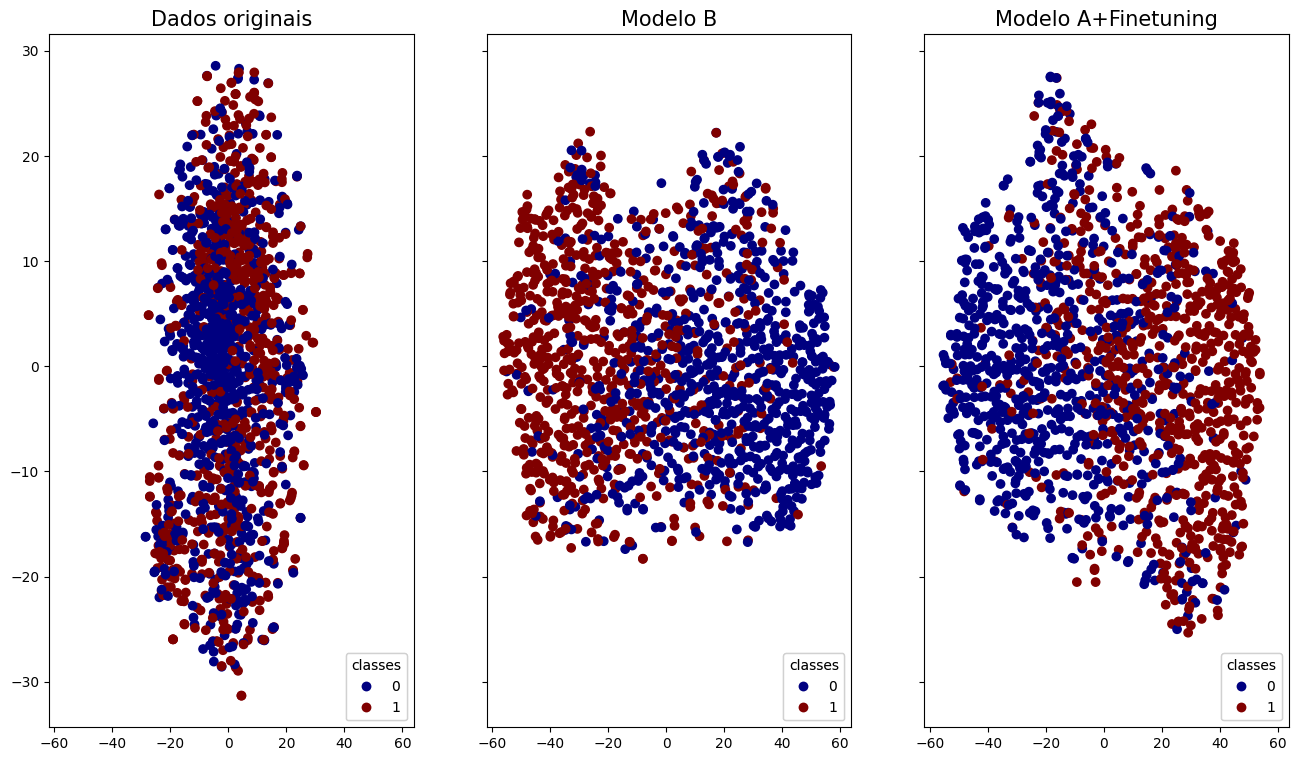

In [51]:
# Comparando
fig, ax = plt.subplots(nrows=1, ncols=3, sharex = True, sharey = True, figsize = (16,9))
ax[0].set_title('Dados originais', fontsize=15)
scatter = ax[0].scatter(emb_original[:,0], emb_original[:,1], c=pt_y_test, cmap="jet")
legend1 = ax[0].legend(*scatter.legend_elements(), loc="lower right", title="classes")
ax[0].add_artist(legend1)
ax[1].set_title('Modelo B', fontsize=15)
scatter = ax[1].scatter(emb_B[:,0], emb_B[:,1], c=pt_y_test, cmap="jet")
legend1 = ax[1].legend(*scatter.legend_elements(), loc="lower right", title="classes")
ax[1].add_artist(legend1)
ax[2].set_title('Modelo A+Finetuning', fontsize=15)
scatter = ax[2].scatter(emb_A_Fit[:,0], emb_A_Fit[:,1], c=pt_y_test, cmap="jet")
legend1 = ax[2].legend(*scatter.legend_elements(), loc="lower right", title="classes")
ax[2].add_artist(legend1)


# ----------------------------------------------------------------
# Conclusão Geral
# ----------------------------------------------------------------

Os modelos parecem ter um desempenho razoável nos conjuntos de teste originais, mas a adaptação cruzada entre idiomas pode impactar o desempenho, com variações entre os modelos. A escolha entre eles pode depender de considerações práticas, como a facilidade de treinamento, a disponibilidade de dados e a necessidade de lidar com múltiplos idiomas. O finetuning do Modelo A para o português também mostrou ser uma estratégia eficaz para adaptar o modelo a um novo idioma, apesar dos resultados das métricas serem menores, a diferença não foi tão grande. 

Os resultados também foram influenciados pela dimensionalidade do conjunto, que foi reduzido ppor questões de processamento, mas recomenda-se fortemente que sejam incluídas todo o conjunto, o que pode melhorar as métricas. 

# -------------------------------------------------------------------------
# Possíveis estratégias para melhorar os resultados
# -------------------------------------------------------------------------

1. **Avaliação de Outras Redes Neurais:**
   - Modelos mais complexos ou ajustes na arquitetura podem levar a melhres resultados. Explorar redes neurais recorrentes (RNNs), redes neurais convolucionais (CNNs), ou outros modelos pode ser benéfico. 


2. **Fine-tuning Adicional:**
   - Ajustar os hiperparâmetros e continuar o processo de finetuning. Encontrar a combinação ideal de parâmetros que melhore o desempenho do modelo em diferentes idiomas.



3. **Avaliação de Métricas Adicionais:**
   - Além de precision e recall, avaliar outras métricas, como F1-score, para ter uma visão mais abrangente do desempenho do modelo.


4. **Experimentação com Outras Bibliotecas:**
   - Experimentar outras bibliotecas ou ferramentas específicas para processamento de linguagem natural. Às vezes, diferentes implementações ou modelos podem trazer avanços significativos nos resultados. 


5. **Análise de Erros:**
   - Analise os erros cometidos pelos modelos. Entender onde os modelos estão errando pode fornecer insights sobre possíveis melhorias na arquitetura ou nos dados.



# ----------------------------------------------------------------
# Referências
# ----------------------------------------------------------------

**Dataset**

1. O conjunto de dados utilizado neste projeto está diponível em: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/data


**Livros e artigos**

1. Rodrigo Mello, Moacir A. Ponti. Machine Learning: a
practical approach on the statistical learning theory
Springer, 2018. Disponível em: https://doi.org/10.1007/978-3-319-94989-5


2. Moacir A. Ponti, Gabriel Paranhos da Costa. Como funciona
o Deep Learning SBC, 2017. Book chapter. Disponível em:
https://doi.org/10.48550/arXiv.1806.07908


3. Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016. Disponível em: http://www.deeplearningbook.org
  
  **Observação**: repositório do livro disponível em: https://github.com/janishar/mit-deep-learning-book-pdf?tab=readme-ov-file
  

4. Chollet, Francois. Deep learning with Python. Simon and Schuster, 2021.